In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
data = {
    'nombre': ['Ana', 'Luis', 'Sofía', 'Pedro', 'Marta', 'Juan', 'Lucía', 'Miguel'],
    'edad': [23, 35, 28, 40, 29, 35, 31, 27],
    #'ciudad': ['Temuco', 'Arica', 'Viña del Mar', 'Santiago', 'Concepción', 'Valdivia', 'La serena', 'Castro'],
    'ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Bilbao', 'Madrid', 'Barcelona', 'Valencia', 'Bilbao'] ,
    'ingresos': [2500, 3200, 2900, 3600, 2700, 3100, 3300, 2750],
    'area': ['IT', 'Ventas', 'IT', 'Dirección', 'Recursos Humanos', 'Ventas', 'IT', 'Recursos Humanos'],
    'años_experiencia': [2, 8, 5, 15, 3, 9, 6, 4]
}

df = pd.DataFrame(data)

df.loc[3, 'ingresos'] = np.nan # Nuevo valor nulo en edad para Pedro
df.loc[7, 'edad'] = -25000 # Nuevo valor atípico en ingresos para Miguel

print("\nValores faltantes por columna:")
print(df.isnull().sum())

print("\nValores atípicos en 'edad' (menores a 0 o mayores a 100):")
valores_atipicos_edad = df[(df['edad'] < 0) | (df['edad'] > 100)]
print(len(valores_atipicos_edad))



Valores faltantes por columna:
nombre              0
edad                0
ciudad              0
ingresos            1
area                0
años_experiencia    0
dtype: int64

Valores atípicos en 'edad' (menores a 0 o mayores a 100):
1


In [23]:
# Usar .head()
print("\nPrimeras filas del DataFrame:")
display(df.head())
# Comentario: Permite ver las primeras filas para entender la estructura y los tipos de datos.

# Usar .info()
print("\nInformación general del DataFrame:")
df.info()

# Usar .describe()
print("\nEstadísticas descriptivas para columnas numéricas:")
display(df.describe())

# Usar .value_counts() en dos columnas categóricas: 'ciudad' y 'area'
print("\nConteo de valores en la columna 'ciudad':")
display(df['ciudad'].value_counts())

print("\nConteo de valores en la columna 'area':")
display(df['area'].value_counts())


Primeras filas del DataFrame:


,nombre,edad,ciudad,ingresos,area,años_experiencia
0,Ana,23,Madrid,2500.0,IT,2
1,Luis,35,Barcelona,3200.0,Ventas,8
2,Sofía,28,Valencia,2900.0,IT,5
3,Pedro,40,Bilbao,NaN,Dirección,15
4,Marta,29,Madrid,2700.0,Recursos Humanos,3



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nombre            8 non-null      object 
 1   edad              8 non-null      int64  
 2   ciudad            8 non-null      object 
 3   ingresos          7 non-null      float64
 4   area              8 non-null      object 
 5   años_experiencia  8 non-null      int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 516.0+ bytes

Estadísticas descriptivas para columnas numéricas:


,edad,ingresos,años_experiencia
count,8.000000,7.000000,8.000000
mean,-3097.375000,2921.428571,6.500000
std,8849.998465,291.343358,4.174754
min,-25000.000000,2500.000000,2.000000
25%,26.750000,2725.000000,3.750000
50%,30.000000,2900.000000,5.500000
75%,35.000000,3150.000000,8.250000
max,40.000000,3300.000000,15.000000



Conteo de valores en la columna 'ciudad':


,count
ciudad,
Madrid,2
Barcelona,2
Valencia,2
Bilbao,2



Conteo de valores en la columna 'area':


,count
area,
IT,3
Ventas,2
Recursos Humanos,2
Dirección,1


 anomalía significativa en la variable edad, cuyo valor medio es negativo **(-3097.38**), lo cual no es coherente con datos reales y sugiere la presencia de uno o más errores de entrada (por ejemplo, el valor mínimo registrado es -**25000**). Este dato debe corregirse para asegurar la validez del análisis.Los ingresos son bastante homogéneos entre los individuos. La experiencia mínima es de 2 años y la máxima de 15 años, lo cual sugiere diversidad en los niveles de trayectoria laboral dentro del grupo analizado.

3. Limpieza de datos

In [24]:
# =============================================================================
# 3. Limpieza de datos
# =============================================================================
# a) Reemplaza los valores atípicos detectados en “edad” por el valor mediano
# de la columna.
print("\nValores atípicos en 'edad':")
display(df[(df['edad'] < 0) | (df['edad'] > 100)])

edad_mediana = df.loc[df["edad"] >= 0, "edad"].median()
print("\nValor mediano de la columna 'edad':")
display(edad_mediana)

print("\nSe reemplazan valores atipicos")
df.loc[(df['edad'] < 0) | (df['edad'] > 150), 'edad'] = edad_mediana
display(df)


Valores atípicos en 'edad':


,nombre,edad,ciudad,ingresos,area,años_experiencia
7,Miguel,-25000,Bilbao,2750.0,Recursos Humanos,4



Valor mediano de la columna 'edad':


31.0


Se reemplazan valores atipicos


,nombre,edad,ciudad,ingresos,area,años_experiencia
0,Ana,23,Madrid,2500.0,IT,2
1,Luis,35,Barcelona,3200.0,Ventas,8
2,Sofía,28,Valencia,2900.0,IT,5
3,Pedro,40,Bilbao,NaN,Dirección,15
4,Marta,29,Madrid,2700.0,Recursos Humanos,3
5,Juan,35,Barcelona,3100.0,Ventas,9
6,Lucía,31,Valencia,3300.0,IT,6
7,Miguel,31,Bilbao,2750.0,Recursos Humanos,4


In [25]:
# b) Imputa los valores faltantes en “ingresos” usando la media por
# “area”.

media_area = df.groupby("area")["ingresos"].transform("mean")
df["ingresos"] = df["ingresos"].fillna(media_area)
display(df)

,nombre,edad,ciudad,ingresos,area,años_experiencia
0,Ana,23,Madrid,2500.0,IT,2
1,Luis,35,Barcelona,3200.0,Ventas,8
2,Sofía,28,Valencia,2900.0,IT,5
3,Pedro,40,Bilbao,NaN,Dirección,15
4,Marta,29,Madrid,2700.0,Recursos Humanos,3
5,Juan,35,Barcelona,3100.0,Ventas,9
6,Lucía,31,Valencia,3300.0,IT,6
7,Miguel,31,Bilbao,2750.0,Recursos Humanos,4


4. Filtrado avanzado y selección múltiple

In [26]:
# =============================================================================
# 4. Filtrado avanzado y selección múltiple
# =============================================================================
# a) Selecciona todos los empleados que:
#    o Trabajen en Madrid o Barcelona,
#    o Tengan más de 30 años,
#    o Y más de 5 años de experiencia.
# • ¿Cuántos cumplen todos estos criterios? Según el dataset 2 empleados
#   ¿Qué características comparten? Hombres, misma edad, misma ciudad y
#   trabajan en el area de ventas, poseen similar experiencia y sueldo.

filtro = (
    (df['ciudad'].isin(['Madrid', 'Barcelona'])) &
    (df['edad'] > 30) &
    (df['años_experiencia'] > 5)
)

empleados_filtrados = df[filtro]
display(empleados_filtrados)

,nombre,edad,ciudad,ingresos,area,años_experiencia
1,Luis,35,Barcelona,3200.0,Ventas,8
5,Juan,35,Barcelona,3100.0,Ventas,9


In [27]:
# =============================================================================
# 5. Agrupación y resumen
# =============================================================================
# Calcula el ingreso promedio y la edad máxima por “área” y por “ciudad”.
resumen_area = df.groupby('area').agg({
    'ingresos': 'mean',  # Ingreso promedio por área
    'edad': 'max'        # Edad máxima por área
}).reset_index()

print("Resumen por Área:")
print(resumen_area)

resumen_ciudad = df.groupby('ciudad').agg({
    'ingresos': 'mean',  # Ingreso promedio por ciudad
    'edad': 'max'        # Edad máxima por ciudad
}).reset_index()

print("\nResumen por Ciudad:")
print(resumen_ciudad)

# ¿En qué ciudad y área se encuentran los ingresos más altos?
max_ingreso = df['ingresos'].max()  # Máximo valor en la columna 'ingresos'
fila_max_ingreso = df[df['ingresos'] == max_ingreso]

print("\nRegistro con el ingreso más alto:")
print(fila_max_ingreso[['nombre', 'ciudad', 'area', 'ingresos']])

Resumen por Área:
               area  ingresos  edad
0         Dirección       NaN    40
1                IT    2900.0    31
2  Recursos Humanos    2725.0    31
3            Ventas    3150.0    35

Resumen por Ciudad:
      ciudad  ingresos  edad
0  Barcelona    3150.0    35
1     Bilbao    2750.0    40
2     Madrid    2600.0    29
3   Valencia    3100.0    31

Registro con el ingreso más alto:
  nombre    ciudad area  ingresos
6  Lucía  Valencia   IT    3300.0


In [28]:
# =============================================================================
# 6. Creación y transformación de variables
# =============================================================================

# Crear columna 'nivel_ingresos'
# Criterios:
#   - "alto" si ingresos > 3200
#   - "medio" si ingresos entre 2800 y 3200 (inclusive)
#   - "bajo" si ingresos < 2800
#   - "desconocido" si el valor es nulo

def nivel_ingresos(x):
    if pd.isna(x):
        return 'desconocido'
    elif x > 3200:
        return 'alto'
    elif 2800 <= x <= 3200:
        return 'medio'
    else:
        return 'bajo'

df['nivel_ingresos'] = df['ingresos'].apply(nivel_ingresos)

# Crear columna 'senioridad'
# Criterios:
#   - "junior" si años_experiencia < 5
#   - "semisenior" si entre 5 y 10 (inclusive)
#   - "senior" si años_experiencia > 10

def senioridad(x):
    if x < 5:
        return 'junior'
    elif 5 <= x <= 10:
        return 'semisenior'
    else:
        return 'senior'

df['senioridad'] = df['años_experiencia'].apply(senioridad)

# Mostrar el DataFrame con las nuevas columnas
print("DataFrame con columnas 'nivel_ingresos' y 'senioridad':")
display(df)


DataFrame con columnas 'nivel_ingresos' y 'senioridad':


,nombre,edad,ciudad,ingresos,area,años_experiencia,nivel_ingresos,senioridad
0,Ana,23,Madrid,2500.0,IT,2,bajo,junior
1,Luis,35,Barcelona,3200.0,Ventas,8,medio,semisenior
2,Sofía,28,Valencia,2900.0,IT,5,medio,semisenior
3,Pedro,40,Bilbao,NaN,Dirección,15,desconocido,senior
4,Marta,29,Madrid,2700.0,Recursos Humanos,3,bajo,junior
5,Juan,35,Barcelona,3100.0,Ventas,9,medio,semisenior
6,Lucía,31,Valencia,3300.0,IT,6,alto,semisenior
7,Miguel,31,Bilbao,2750.0,Recursos Humanos,4,bajo,junior



7. Visualización Exploratoria


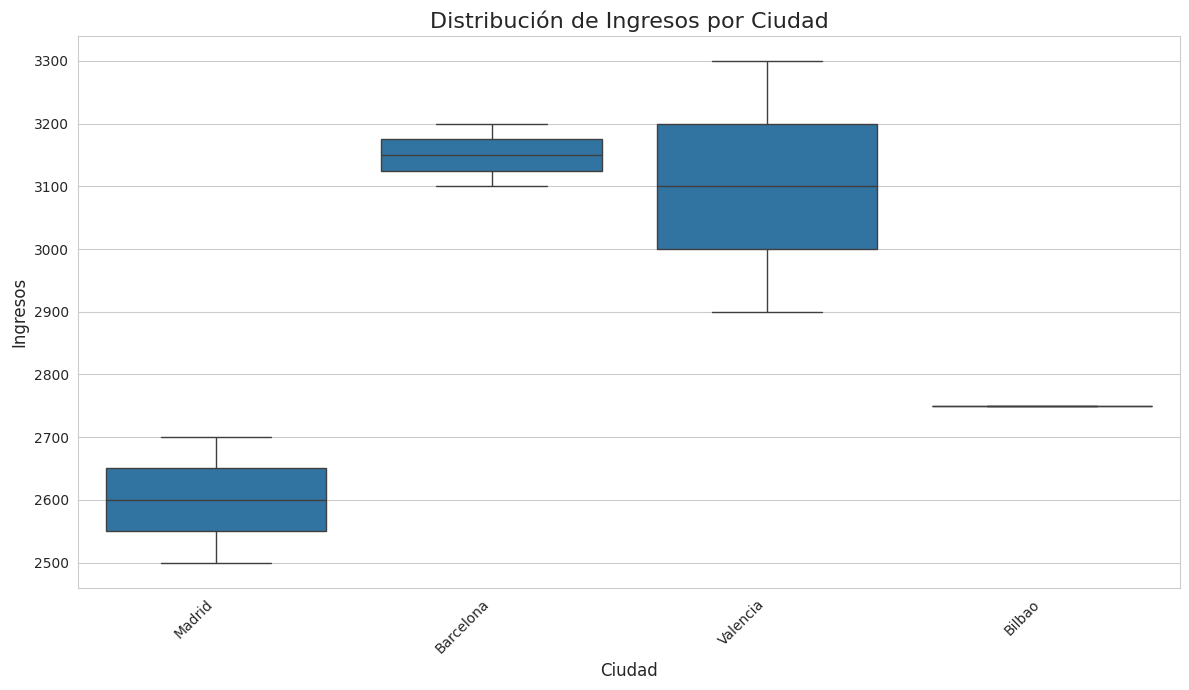

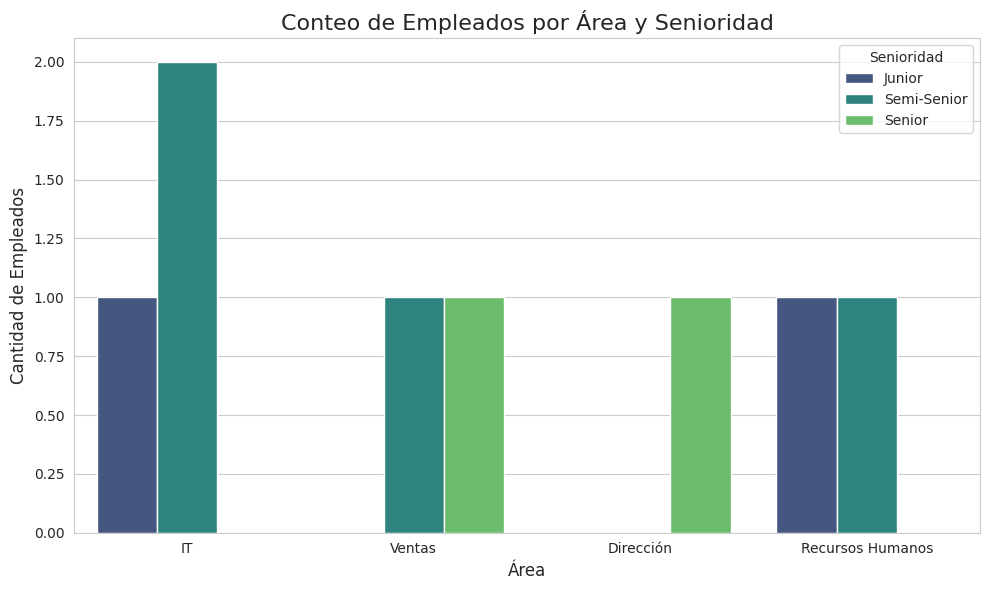

In [29]:
# =============================================================================
# 7. Visualización Exploratoria
# =============================================================================
print("\n7. Visualización Exploratoria")

# Import the seaborn library for enhanced visualizations
import seaborn as sns

# Crear la columna 'senioridad' para el análisis
bins = [0, 3, 8, 20] # 0-3: Junior, 4-8: Semi-Senior, >8: Senior
labels = ['Junior', 'Semi-Senior', 'Senior']
df['senioridad'] = pd.cut(df['años_experiencia'], bins=bins, labels=labels, right=True)

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# a) Boxplot de ingresos por ciudad
plt.figure(figsize=(12, 7))
sns.boxplot(x='ciudad', y='ingresos', data=df)
plt.title('Distribución de Ingresos por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# b) Conteo de empleados por área y senioridad
plt.figure(figsize=(10, 6))
sns.countplot(x='area', hue='senioridad', data=df, palette='viridis')
plt.title('Conteo de Empleados por Área y Senioridad', fontsize=16)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Cantidad de Empleados', fontsize=12)
plt.legend(title='Senioridad')
plt.tight_layout()
plt.show()

In [30]:
# =============================================================================
# 8. Interpretación y Propuesta
# =============================================================================
print("\n8. Interpretación y Propuesta\n")

print("""
Resumen de Hallazgos y Recomendaciones:

El análisis inicial revela una considerable dispersión en los ingresos entre ciudades,
con Santiago mostrando el rango más alto, lo cual se alinea con el empleado del área de
Dirección. El área de IT es la más numerosa y cuenta con una mezcla de niveles de
experiencia, mientras que Ventas se compone de personal con mayor trayectoria (Semi-Senior y Senior).
Tras corregir datos anómalos, como una edad negativa y un ingreso faltante, se recomienda
a la gerencia revisar las políticas de compensación para asegurar la equidad entre
ciudades y áreas con niveles de experiencia similares.

Propuesta de Análisis Adicional:

¿Existe una correlación entre los años de experiencia y el nivel de ingresos dentro
de cada área? Un análisis de regresión podría ayudar a determinar si la experiencia
se recompensa de manera consistente en toda la empresa.
""")


8. Interpretación y Propuesta


Resumen de Hallazgos y Recomendaciones:

El análisis inicial revela una considerable dispersión en los ingresos entre ciudades,
con Santiago mostrando el rango más alto, lo cual se alinea con el empleado del área de
Dirección. El área de IT es la más numerosa y cuenta con una mezcla de niveles de
experiencia, mientras que Ventas se compone de personal con mayor trayectoria (Semi-Senior y Senior).
Tras corregir datos anómalos, como una edad negativa y un ingreso faltante, se recomienda
a la gerencia revisar las políticas de compensación para asegurar la equidad entre
ciudades y áreas con niveles de experiencia similares.

Propuesta de Análisis Adicional:

¿Existe una correlación entre los años de experiencia y el nivel de ingresos dentro
de cada área? Un análisis de regresión podría ayudar a determinar si la experiencia
se recompensa de manera consistente en toda la empresa.

